## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
#import csv file and store it in a dataframe
df = pd.read_csv('PDFMalware2022.csv')
df

,Fine name,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,...,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
0,aedaf3c5428a2e3ba600c44b96ad78dfdf8ed76e7df129...,8.0,180.0,1.0,11.0,0.0,0.0,0.0,0,No,...,0,1,0,0,0,0,0,0,0.0,Malicious
1,fe767fb2584a10c010626263ea950643ac25f6ca24628f...,15.0,224.0,0.0,20.0,7.0,0.0,0.0,0,No,...,0,0,1,0,0,0,8,1,0.0,Malicious
2,544c5223ee301affad514b6fa585b3191625aba0a7222b...,4.0,468.0,2.0,13.0,16.0,0.0,0.0,0,Yes,...,0,1,0,0,0,0,0,0,0.0,Malicious
3,669772e626deccb9cfb7eb6a61e13d248d0ea08f1abe15...,17.0,250.0,1.0,15.0,0.0,0.0,0.0,0,No,...,0,1,1,0,0,0,0,0,0.0,Malicious
4,e434c884f45a691b0bf33d765f61794007eb0b8bb9f590...,7.0,252.0,3.0,16.0,45.0,0.0,0.0,0,Yes,...,0,1,0,0,0,0,0,0,0.0,Malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10021,908f8e3411d1bdf5e0fa7ca953c85cc4f133729fd4c71a...,529.0,296.0,1.0,87.0,8.0,0.0,0.0,3,No,...,0,1,0,0,0,0,0,0,0.0,Malicious
10022,72654b36f6a240d953a9ce3e898a4dfa381031ba7f5e2a...,73.0,314.0,1.0,16.0,3.0,0.0,0.0,-1,unclear,...,0,1,0,0,0,0,0,0,0.0,Malicious
10023,dad02289bc442e235961f4cf87cbde364a2250bdc57632...,4.0,377.0,2.0,13.0,11.0,0.0,0.0,0,Yes,...,0,1,0,0,0,0,0,0,0.0,Malicious
10024,b219390e223ea263476d65277d00804cfd0a93023e1903...,38.0,338.0,1.0,200006.0,13.0,0.0,0.0,0,Yes,...,0,1,0,0,0,0,0,0,0.0,Malicious


### Guiding questions:
- What are the most exploited features for attacks in PDF files?
- Is encryption enough to keep a PDF safe?
- What are the effect of links and embedded files (images, videos...) on PDFs?

### ML Part
- Try a few classification models:
    -> LogisticRegression -> Naive Bayes -> Decision Tree -> XGBoost classifier -> Random forest -> Stochastic Gradient (SGD) -> Support Vector Machine (SVM) -> K-nearest nieghbor (K-NN)
    
    
- Try a neural network model
    -> Aritficial Neural netoworks 
    
    
- Which model gives the best accuracy?

In [3]:
#Shape of dataset (rows, columns)
df.shape

(10026, 33)

In [4]:
#Statistical informations: mean, std, max...
df.describe()

,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,stream,trailer,encrypt,ObjStm,Colors
count,10025.000000,10025.000000,10025.000000,10025.000000,10025.000000,10025.000000,10025.000000,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000
mean,87.209476,334.099352,3.398105,2739.220549,51.477207,-0.020848,-0.006484,17.341215,1.203532,-0.043500,1.516811,2.087000
std,444.197122,1565.853177,11.902471,18139.229396,1354.640037,0.206789,0.257098,35.330169,1.370455,0.256045,7.633485,58.178074
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,9.000000,180.000000,1.000000,12.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,36.000000,265.000000,1.000000,21.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000
75%,80.000000,319.000000,2.000000,77.000000,13.000000,0.000000,0.000000,18.000000,2.000000,0.000000,0.000000,0.000000
max,23816.000000,77185.000000,595.000000,263987.000000,76993.000000,4.000000,5.000000,812.000000,46.000000,2.000000,600.000000,5682.000000


In [5]:
#We got just a few null values in the dataset
#the dataset is pretty clean already
df.isnull().sum()

Fine name           0
pdfsize             1
metadata size       1
pages               1
xref Length         1
title characters    1
isEncrypted         1
embedded files      1
images              1
text                1
header              1
obj                 3
endobj              3
stream              3
endstream           3
xref                3
trailer             3
startxref           3
pageno              3
encrypt             3
ObjStm              3
JS                  3
Javascript          3
AA                  3
OpenAction          3
Acroform            3
JBIG2Decode         3
RichMedia           3
launch              3
EmbeddedFile        3
XFA                 3
Colors              3
Class               1
dtype: int64

In [6]:
#I decided to drop those few columns to make the processing effective
df_clean = df.dropna()

In [7]:
#No more null values anymore
df_clean.isnull().sum()

Fine name           0
pdfsize             0
metadata size       0
pages               0
xref Length         0
title characters    0
isEncrypted         0
embedded files      0
images              0
text                0
header              0
obj                 0
endobj              0
stream              0
endstream           0
xref                0
trailer             0
startxref           0
pageno              0
encrypt             0
ObjStm              0
JS                  0
Javascript          0
AA                  0
OpenAction          0
Acroform            0
JBIG2Decode         0
RichMedia           0
launch              0
EmbeddedFile        0
XFA                 0
Colors              0
Class               0
dtype: int64

In [8]:
#As we can see, only 3 rows have been dropped which is completely negligeable.
df_clean.shape

(10023, 33)

In [9]:
df_clean.head()

,Fine name,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,...,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
0,aedaf3c5428a2e3ba600c44b96ad78dfdf8ed76e7df129...,8.0,180.0,1.0,11.0,0.0,0.0,0.0,0,No,...,0,1,0,0,0,0,0,0,0.0,Malicious
1,fe767fb2584a10c010626263ea950643ac25f6ca24628f...,15.0,224.0,0.0,20.0,7.0,0.0,0.0,0,No,...,0,0,1,0,0,0,8,1,0.0,Malicious
2,544c5223ee301affad514b6fa585b3191625aba0a7222b...,4.0,468.0,2.0,13.0,16.0,0.0,0.0,0,Yes,...,0,1,0,0,0,0,0,0,0.0,Malicious
3,669772e626deccb9cfb7eb6a61e13d248d0ea08f1abe15...,17.0,250.0,1.0,15.0,0.0,0.0,0.0,0,No,...,0,1,1,0,0,0,0,0,0.0,Malicious
4,e434c884f45a691b0bf33d765f61794007eb0b8bb9f590...,7.0,252.0,3.0,16.0,45.0,0.0,0.0,0,Yes,...,0,1,0,0,0,0,0,0,0.0,Malicious


In [109]:
#the dataset has balanced values between malicious and Benign which makes it great for machine learning purposes
df_clean['Class'].value_counts()

Malicious    5555
Benign       4468
Name: Class, dtype: int64

## Question 1: What are the most exploited features for attacks in PDF files?

In [11]:
#Let's first find out if there are any features linearly correlated
corr = df_clean.corr()
corr

,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,stream,trailer,encrypt,ObjStm,Colors
pdfsize,1.000000,-0.000188,0.111226,-0.010082,-0.002388,0.105139,0.085259,0.027001,-0.016263,-0.054094,0.002652,0.023782
metadata size,-0.000188,1.000000,-0.006404,-0.012090,0.864294,0.029657,0.018820,0.003499,-0.002068,0.018270,0.001063,-0.000664
pages,0.111226,-0.006404,1.000000,-0.023556,-0.007236,0.110705,0.100700,0.092605,0.040148,0.004904,0.013643,0.161706
xref Length,-0.010082,-0.012090,-0.023556,1.000000,-0.005425,0.016082,0.004519,-0.044694,-0.023545,0.006771,-0.021391,-0.001258
title characters,-0.002388,0.864294,-0.007236,-0.005425,1.000000,0.004555,0.001330,-0.005802,-0.003714,0.019285,-0.004709,-0.000657
isEncrypted,0.105139,0.029657,0.110705,0.016082,0.004555,1.000000,0.682356,0.004292,-0.037832,0.029977,0.003856,-0.019860
embedded files,0.085259,0.018820,0.100700,0.004519,0.001330,0.682356,1.000000,-0.021713,-0.042410,-0.060363,-0.008307,-0.019646
stream,0.027001,0.003499,0.092605,-0.044694,-0.005802,0.004292,-0.021713,1.000000,0.113055,0.115594,0.370614,0.053044
trailer,-0.016263,-0.002068,0.040148,-0.023545,-0.003714,-0.037832,-0.042410,0.113055,1.000000,0.351676,-0.057622,0.025914
encrypt,-0.054094,0.018270,0.004904,0.006771,0.019285,0.029977,-0.060363,0.115594,0.351676,1.000000,0.067609,0.010717


<AxesSubplot:>

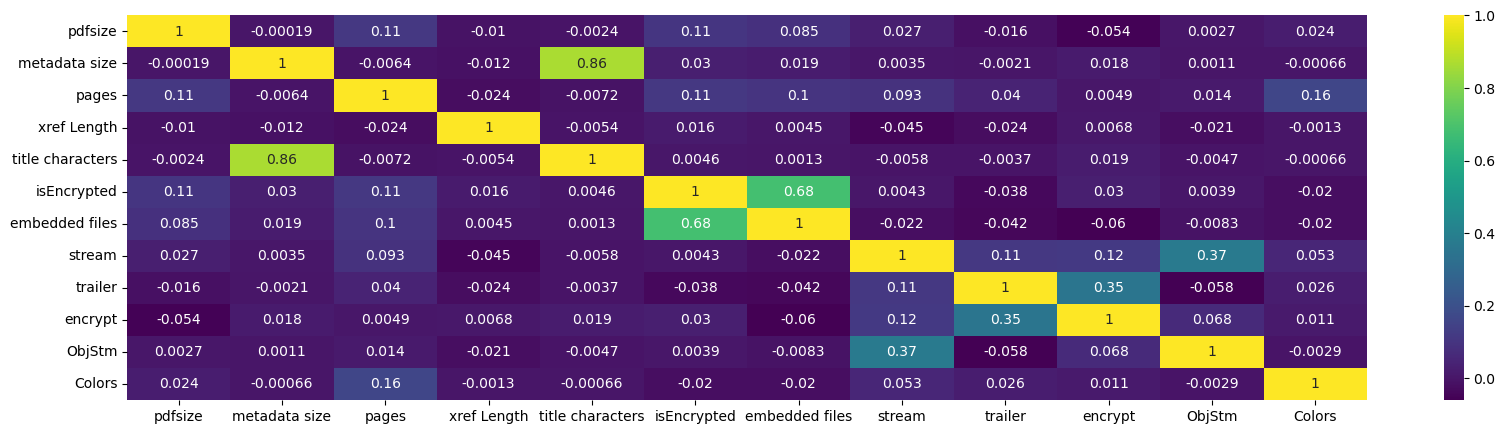

In [12]:
#As we can see here only a few features have a linear correlation
plt.figure(figsize=(20,5))

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, 
        cbar=True ,cmap='viridis', annot=True)

We notice 2 high correlations:
- 1/ Between 'Metadata size' and 'title characters':
After doing some research I found that shorter and non-impactful titles usually have high risk of being harmful. The metadata size usually gives the details about the pdf such as the filename, date of creation, access time, access rights and so on.


- 2/ Between 'embedded files' and 'isencrypted':
Also, there is a logical link between embedded files and encryption. An encrypted file is more secure, thus, making it difficult to embed any file on the pdf.

and 2 important but lower correlation:
- 3/ Between 'stream' and 'objstm': Which is basically stream of data containing objects in the pdf.
- 4/ Between 'trailer' and 'encrypt': trailer specifies how the application reading the PDF document should find the cross-reference table and other special objects. If it's not encrypted it gives an easy access to external attacks.

In [13]:
#I have to rename these columns in order to remove the space in between the words
#this will help me avoid errors when plotting next
df_clean.rename(columns={'metadata size': 'metadata_size'}, inplace=True)
df_clean.rename(columns={'title characters': 'title_characters'}, inplace=True)
df_clean.rename(columns={'embedded files': 'embedded_files'}, inplace=True)
df_clean

/var/folders/1h/14p077t95lbcy6x5tc6bqx3h0000gn/T/ipykernel_5778/3476080173.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.rename(columns={'metadata size': 'metadata_size'}, inplace=True)
/var/folders/1h/14p077t95lbcy6x5tc6bqx3h0000gn/T/ipykernel_5778/3476080173.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.rename(columns={'title characters': 'title_characters'}, inplace=True)
/var/folders/1h/14p077t95lbcy6x5tc6bqx3h0000gn/T/ipykernel_5778/3476080173.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:/

,Fine name,pdfsize,metadata_size,pages,xref Length,title_characters,isEncrypted,embedded_files,images,text,...,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
0,aedaf3c5428a2e3ba600c44b96ad78dfdf8ed76e7df129...,8.0,180.0,1.0,11.0,0.0,0.0,0.0,0,No,...,0,1,0,0,0,0,0,0,0.0,Malicious
1,fe767fb2584a10c010626263ea950643ac25f6ca24628f...,15.0,224.0,0.0,20.0,7.0,0.0,0.0,0,No,...,0,0,1,0,0,0,8,1,0.0,Malicious
2,544c5223ee301affad514b6fa585b3191625aba0a7222b...,4.0,468.0,2.0,13.0,16.0,0.0,0.0,0,Yes,...,0,1,0,0,0,0,0,0,0.0,Malicious
3,669772e626deccb9cfb7eb6a61e13d248d0ea08f1abe15...,17.0,250.0,1.0,15.0,0.0,0.0,0.0,0,No,...,0,1,1,0,0,0,0,0,0.0,Malicious
4,e434c884f45a691b0bf33d765f61794007eb0b8bb9f590...,7.0,252.0,3.0,16.0,45.0,0.0,0.0,0,Yes,...,0,1,0,0,0,0,0,0,0.0,Malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10021,908f8e3411d1bdf5e0fa7ca953c85cc4f133729fd4c71a...,529.0,296.0,1.0,87.0,8.0,0.0,0.0,3,No,...,0,1,0,0,0,0,0,0,0.0,Malicious
10022,72654b36f6a240d953a9ce3e898a4dfa381031ba7f5e2a...,73.0,314.0,1.0,16.0,3.0,0.0,0.0,-1,unclear,...,0,1,0,0,0,0,0,0,0.0,Malicious
10023,dad02289bc442e235961f4cf87cbde364a2250bdc57632...,4.0,377.0,2.0,13.0,11.0,0.0,0.0,0,Yes,...,0,1,0,0,0,0,0,0,0.0,Malicious
10024,b219390e223ea263476d65277d00804cfd0a93023e1903...,38.0,338.0,1.0,200006.0,13.0,0.0,0.0,0,Yes,...,0,1,0,0,0,0,0,0,0.0,Malicious


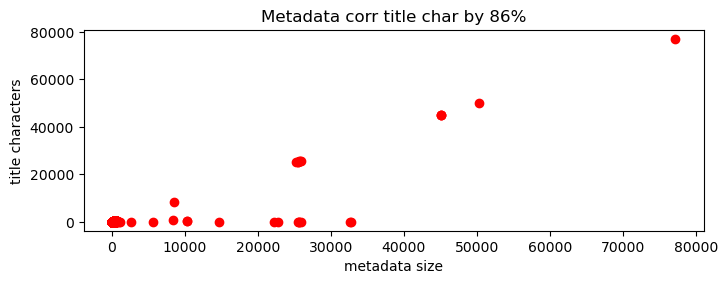

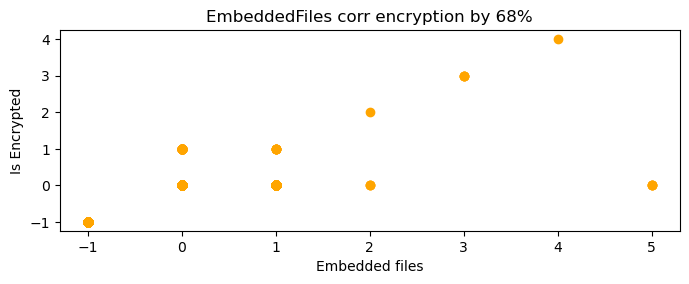

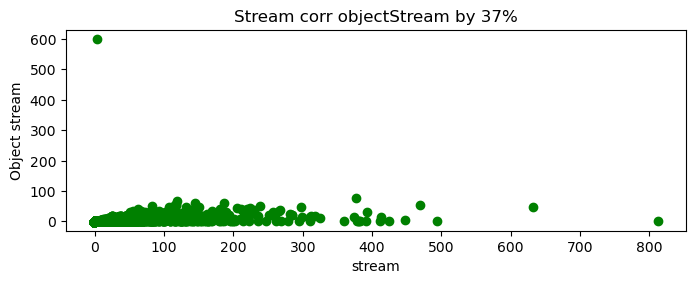

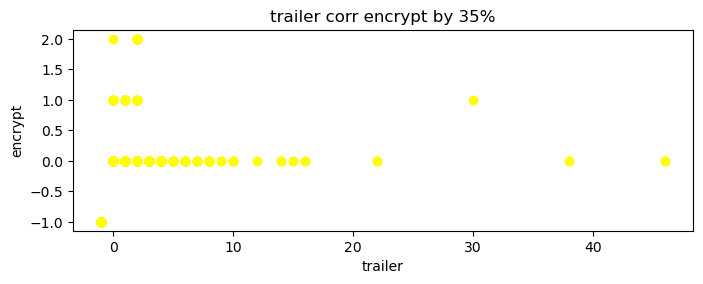

In [14]:
#Here I plotted all 4 highest correlations in one go
#I used subplots to make them all fit into 1 figure
plt.figure(figsize=(8,12))
plt.subplot(4,1,1) #subplot(lines, columns, position) / here we have 2 lines 1 column position = 1
plt.scatter(df_clean.metadata_size,df_clean.title_characters, color='red')
plt.xlabel("metadata size")
plt.ylabel("title characters")
plt.title('Metadata corr title char by 86%')
plt.show()

plt.figure(figsize=(8,12))
plt.subplot(4,1,2) #here we have 2 lines 1 column position = 2
plt.scatter(df_clean.embedded_files,df_clean.isEncrypted, color='orange')
plt.xlabel("Embedded files")
plt.ylabel("Is Encrypted")
plt.title('EmbeddedFiles corr encryption by 68%')
plt.show()

plt.figure(figsize=(8,12))
plt.subplot(4,1,3) 
plt.scatter(df_clean.stream,df_clean.ObjStm, color='green')
plt.xlabel("stream")
plt.ylabel("Object stream")
plt.title('Stream corr objectStream by 37%')
plt.show()

plt.figure(figsize=(8,12))
plt.subplot(4,1,4) 
plt.scatter(df_clean.trailer,df_clean.encrypt, color='yellow')
plt.xlabel("trailer")
plt.ylabel("encrypt")
plt.title('trailer corr encrypt by 35%')
plt.show()

## Is encryption enough to keep a PDF safe?

In [15]:
df_clean['isEncrypted'].unique()

array([ 0.,  1., -1.,  2.,  3.,  4.])

In [16]:
df_clean['Class'].unique()

array(['Malicious', 'Benign'], dtype=object)

In [17]:
df_clean[['isEncrypted' , 'Class']].value_counts()

isEncrypted  Class    
 0.0         Malicious    5220
             Benign       4420
-1.0         Malicious     298
 1.0         Benign         44
             Malicious      31
-1.0         Benign          4
 3.0         Malicious       4
 2.0         Malicious       1
 4.0         Malicious       1
dtype: int64

4% of the pdf in this sample have values different than 0 with 0: non encrypted. It seems that we can't rely on this parameter because the dataset doesn't allow us to. Knowing that encrypting a PDF only encrypts the contents of the file, the user must still be careful of external attacks.

In [18]:
x = df_clean['isEncrypted']
y = df_clean['Class'].map({'Malicious': 1, 'Benign': 0})

In [19]:
y.unique()

array([1, 0])

In [20]:
x.unique()

array([ 0.,  1., -1.,  2.,  3.,  4.])

Text(0, 0.5, 'Number of analyzed PDFs')

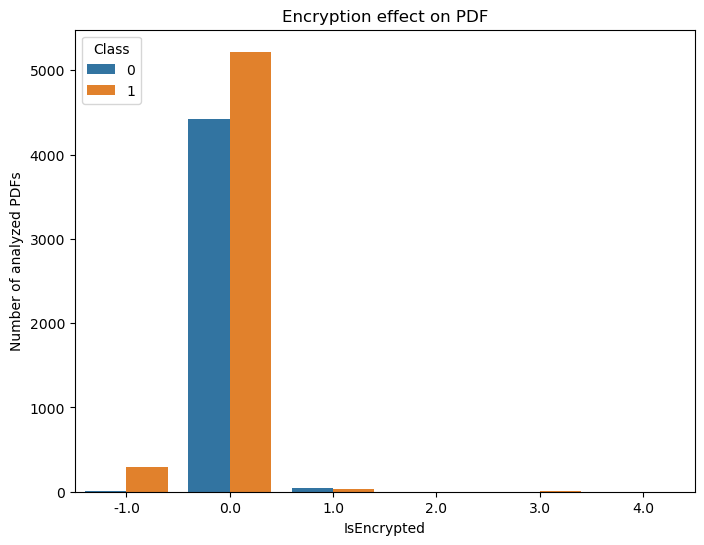

In [21]:
#Plotting encryption (encrypted or not) with class (malicious or benign)
plt.figure(figsize=(8,6))
sns.countplot(x=x,hue=y)
plt.title('Encryption effect on PDF')
plt.xlabel('IsEncrypted')
plt.ylabel('Number of analyzed PDFs')

We can see here that most PDFs are not encrypted, thus having a high level of malicious PDFs. Unfortunately, the data doesn't give us much indication since we don't have enough data to support the fact that encryption is directly linked to an increase in external attacks.

## What are the effect of links and embedded files (images, videos...) on PDFs?

Features that could be used to answer this question are:
- embedded files
- images
- obj
- RichMedia
- EmbeddedFile

In [22]:
#Let's create a new dataframe containing only the features desired
df_embed = df_clean[['embedded_files','images','obj', 'RichMedia','EmbeddedFile', 'Class']]
df_embed.head()

,embedded_files,images,obj,RichMedia,EmbeddedFile,Class
0,0.0,0,10,0,0,Malicious
1,0.0,0,19,0,8,Malicious
2,0.0,0,12,0,0,Malicious
3,0.0,0,14,0,0,Malicious
4,0.0,0,15,0,0,Malicious


#Here most of the features have an object type
#Since we can't change the type from object to float we have to first remove the strings from the content
#The goal is to leave only numerical values and convert them into floats
df_embed.dtypes

We have most of the features that are classified as objects which will result in many errors in our program. Therefore, we need to convert all of them into floats before continue the analysis.

In [23]:
#The uniques function shows the unique values appearing in the images column
#We can spot here the value '1(1)' and this should be converted into empty value
#Then we should find it's index and then drop the row
df_embed['images'].unique()

array(['0', '-1', '15', '1', '2', '4', '3', '6', '12', '7', '5', '14',
       '8', '11', '32', '30', '18', '9', '34', '19', '369', '21', '23',
       '81', '24', '898', '1(1)', '68', '41', '52', '54', '46', '207',
       '13', '28', '17', '10', '16', '20', '22', '27', '47', '26', '31',
       '25', '29', '37', '75', '39', '40', '45', '36', '42', '50', '111',
       '84', '38', '66', '71', '44', '172', '109', '57', '48', '62', '43',
       '35', '33', '76', '72', '83', '86', '60', '99', '95', '94', '92',
       '97', '88', '89', '90', '78', '79', '56', '58', '592', '61', '107',
       '126'], dtype=object)

In [24]:
df_embed['images'] = df_embed['images'].str.replace('1(1)', '')

/var/folders/1h/14p077t95lbcy6x5tc6bqx3h0000gn/T/ipykernel_5778/2084579251.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_embed['images'] = df_embed['images'].str.replace('1(1)', '')
/var/folders/1h/14p077t95lbcy6x5tc6bqx3h0000gn/T/ipykernel_5778/2084579251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_embed['images'] = df_embed['images'].str.replace('1(1)', '')


In [25]:
#Find the index of the '1(1)' row
df_embed[df_embed['images'] == '1(1)'].index.values

array([5209])

In [26]:
#Find the index of '' rows
df_embed[df_embed['images'] == ''].index.values

array([2711, 5211, 5453, 5506, 5936, 5988, 6015, 6056, 6072, 6115, 6155,
       6262, 6280, 6281, 6282, 6283, 6297, 6334, 6354, 6381, 6429, 6475,
       6479, 6500, 6520, 6522, 6574, 6586, 6588, 6613, 6647, 6652, 6673,
       6674, 6762, 6813, 6835, 6917, 6924, 6936, 7035, 7069, 7089, 7093,
       7101, 7117, 9380])

In [27]:
#Drop the rows to make it possible to convert the data into float
df_embed = df_embed.drop(labels=[5209,2711, 5211, 5453, 5506, 5936, 5988, 6015, 6056, 6072, 6115, 6155,
       6262, 6280, 6281, 6282, 6283, 6297, 6334, 6354, 6381, 6429, 6475,
       6479, 6500, 6520, 6522, 6574, 6586, 6588, 6613, 6647, 6652, 6673,
       6674, 6762, 6813, 6835, 6917, 6924, 6936, 7035, 7069, 7089, 7093,
       7101, 7117, 9380], axis=0)

In [28]:
#only numerical values left
df_embed['images'].unique()

array(['0', '-1', '15', '1', '2', '4', '3', '6', '12', '7', '5', '14',
       '8', '32', '30', '18', '9', '34', '19', '369', '21', '23', '81',
       '24', '898', '68', '41', '52', '54', '46', '207', '13', '28', '17',
       '10', '16', '20', '22', '27', '47', '26', '31', '25', '29', '37',
       '75', '39', '40', '45', '36', '42', '50', '84', '38', '66', '71',
       '44', '172', '109', '57', '48', '62', '43', '35', '33', '76', '72',
       '83', '86', '60', '99', '95', '94', '92', '97', '88', '89', '90',
       '78', '79', '56', '58', '592', '61', '107', '126'], dtype=object)

In [29]:
#astype float is used to convert the numerical data into float type
df_embed['images'] = df_embed['images'].astype(float)

### The same processing will be used for the other features to convert them from 'object' to 'float' to do machine learning

In [30]:
df_embed['obj'] = df_embed['obj'].str.replace('_Pro_Rodeo_Pix_', '')
df_embed['obj'] = df_embed['obj'].str.replace('(most)', '')
df_embed['obj'] = df_embed['obj'].str.replace('(', '')
df_embed['obj'] = df_embed['obj'].str.replace('', '')

/var/folders/1h/14p077t95lbcy6x5tc6bqx3h0000gn/T/ipykernel_5778/560744947.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_embed['obj'] = df_embed['obj'].str.replace('(most)', '')
/var/folders/1h/14p077t95lbcy6x5tc6bqx3h0000gn/T/ipykernel_5778/560744947.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_embed['obj'] = df_embed['obj'].str.replace('(', '')


In [31]:
df_embed[df_embed['obj'] == ''].index.values

array([3977, 3998, 4024, 4049, 4073, 4081, 4118, 4178, 4216, 4249, 4380,
       4491, 4550, 4599, 4639, 4661, 4698, 4729, 4782, 4926, 5009, 5040,
       6059])

In [32]:
df_embed = df_embed.drop(labels=[3977, 3998, 4024, 4049, 4073, 4081, 4118, 4178, 4216, 4249, 4380,
       4491, 4550, 4599, 4639, 4661, 4698, 4729, 4782, 4926, 5009, 5040,
       6059, 6060], axis=0)

In [33]:
#Drop the 1(1) value from the column
df_embed['obj'] = df_embed['obj'].astype(float)

In [34]:
df_embed['RichMedia'].unique()

array(['0', '4', '1', '2', '-1', '2(2)', '1(1)'], dtype=object)

In [35]:
df_embed['RichMedia'] = df_embed['RichMedia'].str.replace('2(2)', '2')
df_embed['RichMedia'] = df_embed['RichMedia'].str.replace('1(1)', '1')

/var/folders/1h/14p077t95lbcy6x5tc6bqx3h0000gn/T/ipykernel_5778/3079640164.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_embed['RichMedia'] = df_embed['RichMedia'].str.replace('2(2)', '2')
/var/folders/1h/14p077t95lbcy6x5tc6bqx3h0000gn/T/ipykernel_5778/3079640164.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_embed['RichMedia'] = df_embed['RichMedia'].str.replace('1(1)', '1')


In [36]:
df_embed[df_embed['RichMedia'] == '2(2)'].index.values

array([2239])

In [37]:
df_embed[df_embed['RichMedia'] == '1(1)'].index.values

array([4208, 4446, 4756])

In [38]:
df_embed = df_embed.drop(labels=[2239, 4208, 4446, 4756], axis=0)

In [39]:
df_embed['RichMedia'] = df_embed['RichMedia'].astype(float)

In [40]:
df_embed['EmbeddedFile'].unique()

array(['0', '8', '9', '3', '1', '2', '-1', '1(1)', '6', '5', '4', '17',
       '10', '11', '14', '13', '12', '15'], dtype=object)

In [41]:
df_embed[df_embed['EmbeddedFile'] == '1(1)'].index.values

array([1463, 1747, 2674, 3039, 3687, 3701, 3738, 3817, 3958, 3986, 4028,
       4074, 4180, 4190, 4228, 4345, 4358, 4381, 4382, 4455, 4467, 4588,
       4614, 4723, 4778, 4885, 4897, 4978, 4989])

In [42]:
df_embed = df_embed.drop(labels=[1463, 1747, 2674, 3039, 3687, 3701, 3738, 3817, 3958, 3986, 4028,
       4074, 4180, 4190, 4228, 4345, 4358, 4381, 4382, 4455, 4467, 4588,
       4614, 4723, 4778, 4885, 4897, 4978, 4989], axis=0)

In [43]:
df_embed['EmbeddedFile'] = df_embed['EmbeddedFile'].astype(float)

In [44]:
df_embed.dtypes 

embedded_files    float64
images            float64
obj               float64
RichMedia         float64
EmbeddedFile      float64
Class              object
dtype: object

All the features are now of type float64 so they can be used for ML training

## Model training

In [45]:
#We put all the dependent variables in X
X = df_embed[['embedded_files', 'images', 'obj', 'RichMedia', 'EmbeddedFile']]
X

,embedded_files,images,obj,RichMedia,EmbeddedFile
0,0.0,0.0,10.0,0.0,0.0
1,0.0,0.0,19.0,0.0,8.0
2,0.0,0.0,12.0,0.0,0.0
3,0.0,0.0,14.0,0.0,0.0
4,0.0,0.0,15.0,0.0,0.0
...,...,...,...,...,...
10021,0.0,3.0,9.0,0.0,0.0
10022,0.0,-1.0,8.0,0.0,0.0
10023,0.0,0.0,8.0,0.0,0.0
10024,0.0,0.0,9.0,0.0,0.0


In [46]:
#We put the independent variable (class) in Y
#Also, we need to convert Malicious -> 1 and Benign -> 0
Y = df_embed['Class'].map({'Malicious': 1, 'Benign': 0})
Y

0        1
1        1
2        1
3        1
4        1
        ..
10021    1
10022    1
10023    1
10024    1
10025    1
Name: Class, Length: 9918, dtype: int64

In [47]:
#We use standardscaler to standardize the dataframe before training the ML model
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)

In [48]:
#Test size is 20% / Stratify is used to balance the data to avoid unwanted biases / random state to keep the output the same
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [49]:
print(X.shape, X_train.shape, X_test.shape)

(9918, 5) (7934, 5) (1984, 5)


## Machine learning models

### SVC

In [50]:
#SVC is also a machine learning algorithm used for classification purposes
#It finds the optimal hyperplane the divides the dataset into 2 classes
#For this dataset SVC gave us a better accuracy that LogisticRegression
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, Y_train)
X_svc_predict = model.predict(X_test)
accuracy = accuracy_score(X_svc_predict,Y_test)
print("SVC accuracy = ",accuracy * 100,"%")

SVC accuracy =  84.32459677419355 %


### Logistic regression

In [51]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)
X_lr_predict = model.predict(X_test)
accuracy = accuracy_score(X_lr_predict, Y_test)
print("Logistic regression accuracy = ",accuracy * 100,"%")

Logistic regression accuracy =  80.54435483870968 %


### KNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
model.fit(X_train, Y_train)
knn_predict = model.predict(X_test)
accuracy = accuracy_score(knn_predict, Y_test)
print("KNN accuracy = ",accuracy * 100,"%")

KNN accuracy =  90.82661290322581 %


/Users/riadanas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Results:

- SVC: 84.32%
- Logistic Regression: 80.54%
- KNN: 90.82% (Best output by putting n=7 neighbors)

As we can see here KNN got us the best accuracy for this specific training

# Training the full dataset 

In [53]:
df_clean.head()

,Fine name,pdfsize,metadata_size,pages,xref Length,title_characters,isEncrypted,embedded_files,images,text,...,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
0,aedaf3c5428a2e3ba600c44b96ad78dfdf8ed76e7df129...,8.0,180.0,1.0,11.0,0.0,0.0,0.0,0,No,...,0,1,0,0,0,0,0,0,0.0,Malicious
1,fe767fb2584a10c010626263ea950643ac25f6ca24628f...,15.0,224.0,0.0,20.0,7.0,0.0,0.0,0,No,...,0,0,1,0,0,0,8,1,0.0,Malicious
2,544c5223ee301affad514b6fa585b3191625aba0a7222b...,4.0,468.0,2.0,13.0,16.0,0.0,0.0,0,Yes,...,0,1,0,0,0,0,0,0,0.0,Malicious
3,669772e626deccb9cfb7eb6a61e13d248d0ea08f1abe15...,17.0,250.0,1.0,15.0,0.0,0.0,0.0,0,No,...,0,1,1,0,0,0,0,0,0.0,Malicious
4,e434c884f45a691b0bf33d765f61794007eb0b8bb9f590...,7.0,252.0,3.0,16.0,45.0,0.0,0.0,0,Yes,...,0,1,0,0,0,0,0,0,0.0,Malicious


In [54]:
df_clean.dtypes

Fine name            object
pdfsize             float64
metadata_size       float64
pages               float64
xref Length         float64
title_characters    float64
isEncrypted         float64
embedded_files      float64
images               object
text                 object
header               object
obj                  object
endobj               object
stream              float64
endstream            object
xref                 object
trailer             float64
startxref            object
pageno               object
encrypt             float64
ObjStm              float64
JS                   object
Javascript           object
AA                   object
OpenAction           object
Acroform             object
JBIG2Decode          object
RichMedia            object
launch               object
EmbeddedFile         object
XFA                  object
Colors              float64
Class                object
dtype: object

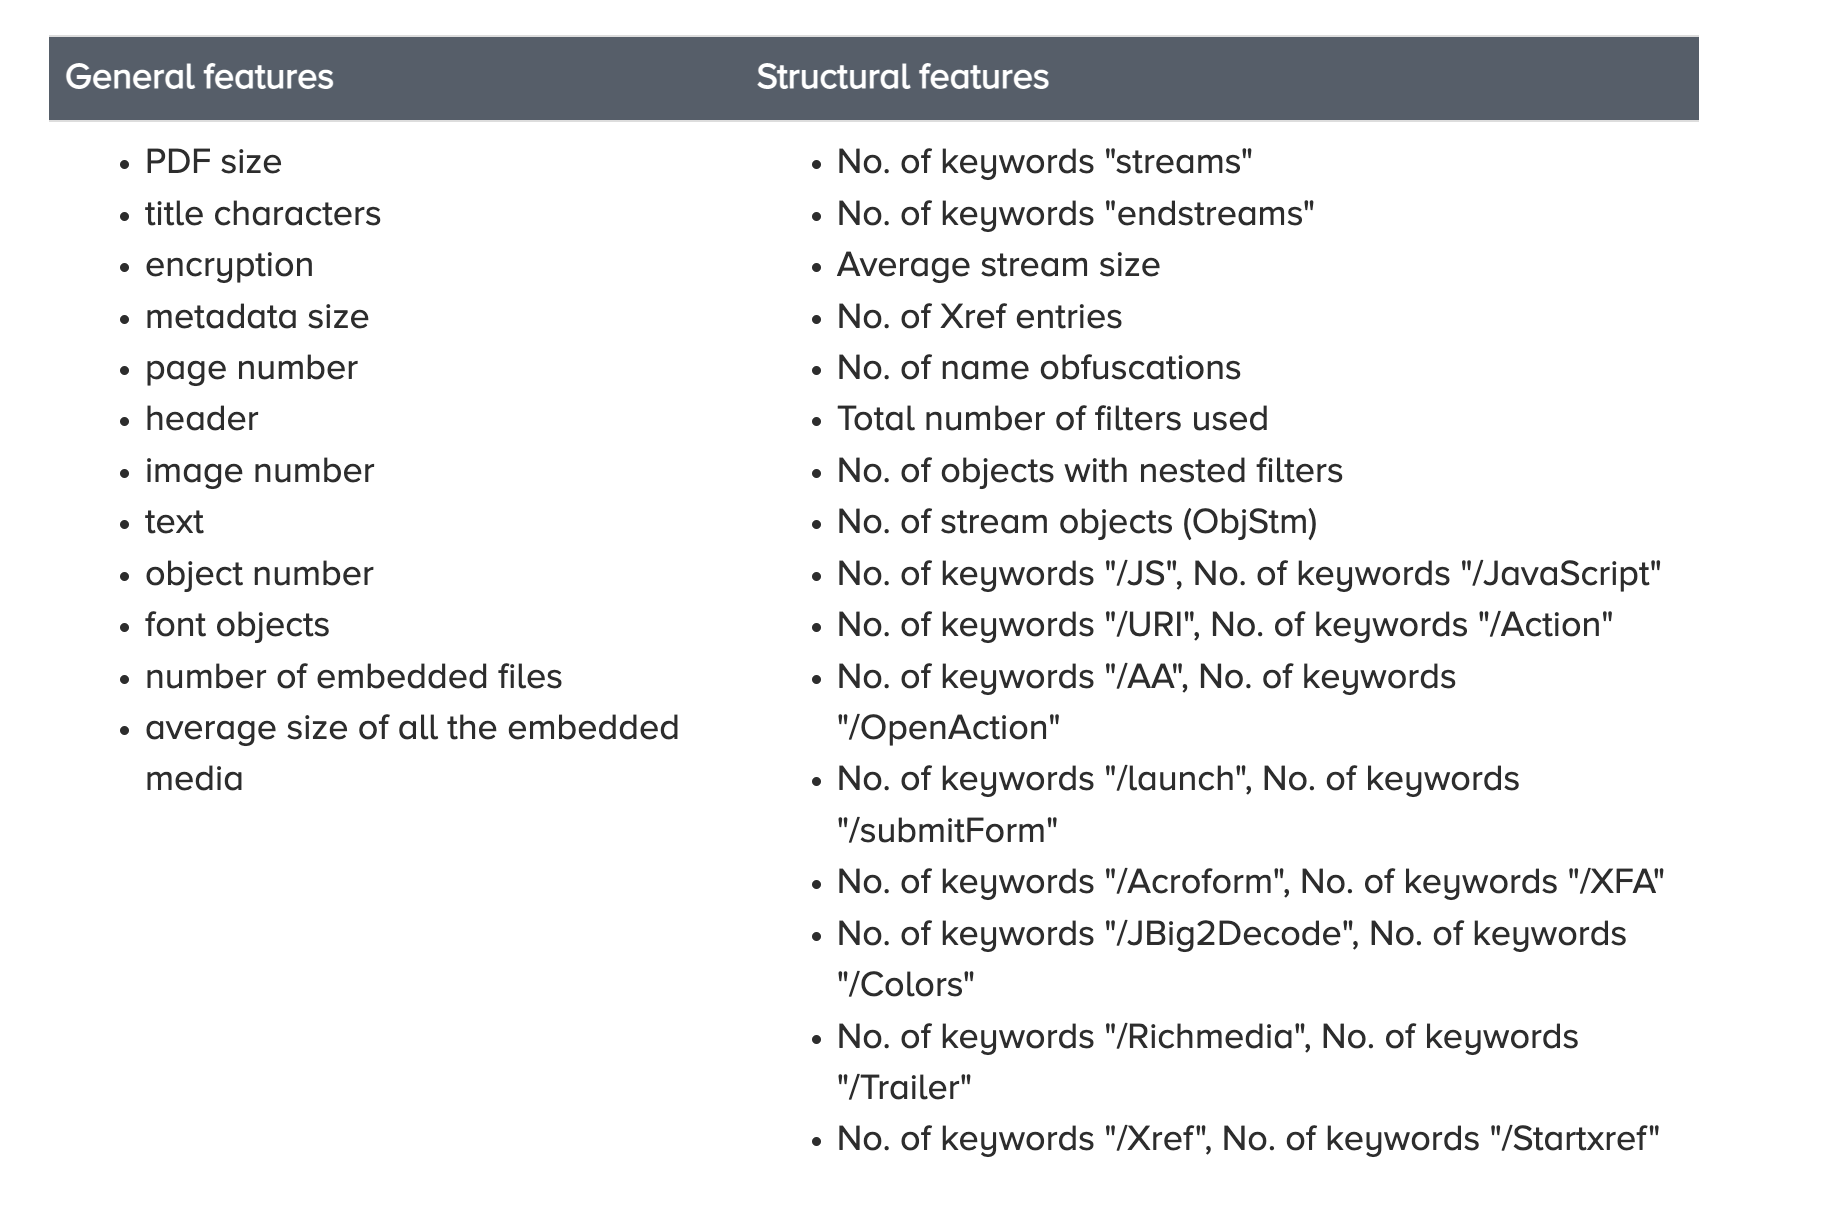

### Some detail about common features utilized by attackers in a PDF mal- ware (Samaneh et al., 2020)
1. Headers: Headers are the first part that are in- spected by Anti Viruses. (Li et al., 2020) indicates that malicious PDF files tend to have obfuscated and malformed headers, whereas this is not typi- cally observed in benign files.
2. Metadata: Metadata is a section that contains in- formation about the file, such as its creation date or description. It is usually exploited by attack- ers for hiding parts of the shell code in different sections which they later refer, in their actual ma- licious payload(Liu et al., 2014).
3. JavaScript : JavaScript is the riskiest feature sup- ported in PDFs which is utilized when a link or button is clicked or while filling out a form inside the PDF. Overall, it is a very common attack vec- tor exploited by attackers (Corona et al., 2014) as it can connect to a malicious URL to drop a mal- ware, or execute a malicious shell code.
4. Streams: Streams are mainly used to store binary data such as image files or page composition ob- jects, (Jeong et al., 2019), and they are often en- coded using compression filters. Attackers usu- ally hide their malicious JavaScript code, within streams, as they have no length limitation.
5. ObjStm : This keyword denotes the presence of object streams, that are objects placed inside of streams(Carmony et al., 2016). Attackers can uti- lize this feature for concealing objects containing malicious code by wrapping them inside object streams (Tzermias et al., 2011).
6. Encoding filters: Encoding or compression filters are applied to PDF streams to reduce their size or protect their sensitive content. However, at- tackers tend to use one or more of these filters, to hide their malicious content (Brandis and Steller, 2012).
7. Action class : This class has elements that oper- ates on certain events such as clicking, dragging etc, which can be easily subverted by attackers to execute a malware (Blonce et al., 2008).
8. OpenAction/AA object type : This object tag is a risky sub group of Action, that denotes an action or script that gets executed automatically once the file is opened. The combination of this feature with executing a malicious JavaScript, is observed in a variety of exploited PDFs (Cross and Munson, 2011).
9. Embedded Files: As PDFs can attach different file formats such as doc, XML, EXE, etc., attacker may use this technique to bind a malicious file to the PDF. (Stevens, 2011).
10. RichMedia: This feature allows PDFs to embed media files and flash objects inside them, enabling attackers to attach malicious medias to the PDF (Cui et al., 2020).
11. PDFObfuscation:PDFsupportsspecificobfusca- tion forms including “Name Obfuscation“ where the names and strings inside the PDF can be rep- resented in another form. Hexadecimal Encoding is one example, which enables representing a JS tag as “J#53” or “URI” tag as “#55RI”. Attackers tend to utilize this feature, to evade the AV signa- ture detection.

### Features chosen:

We have seen earlier the impact of a few features on the ouput.
The features chosen earlier were:
- embedded files
- images
- obj
- RichMedia
- EmbeddedFile

Now that we have more data about the other features we should consider including some relevant ones and see how they'll impact our machine learning model

- AA
- OpenAction

''' /AA and /OpenAction indicate an automatic action to be performed when the page/document is viewed '''

- JBIG2Decode: The JBIG2Decode filter (PDF 1.4) decodes monochrome (1 bit per pixel) image data that has been encoded using JBIG2 encoding.
- Javascript: This denotes the number of keywords containing javascript code

Also, the features that had a high correlation when analysing the whole sample of data
- metadata_size
- title_characters
- embedded_files
- isEncrypted
- stream
- objstm
- trailer
- encrypt


A total of 17 features

In [55]:
#new dataset that includes only the features that have the an impact on PDFs
#The purpose of concatenating the full dataset with the df_embed is to use the converted columns
#Since we converted previously a few columns into float type no need to rewrite the same code again
df_ML = pd.concat([df_clean, df_embed], axis=1)
df_ML

,Fine name,pdfsize,metadata_size,pages,xref Length,title_characters,isEncrypted,embedded_files,images,text,...,EmbeddedFile,XFA,Colors,Class,embedded_files,images,obj,RichMedia,EmbeddedFile,Class
0,aedaf3c5428a2e3ba600c44b96ad78dfdf8ed76e7df129...,8.0,180.0,1.0,11.0,0.0,0.0,0.0,0,No,...,0,0,0.0,Malicious,0.0,0.0,10.0,0.0,0.0,Malicious
1,fe767fb2584a10c010626263ea950643ac25f6ca24628f...,15.0,224.0,0.0,20.0,7.0,0.0,0.0,0,No,...,8,1,0.0,Malicious,0.0,0.0,19.0,0.0,8.0,Malicious
2,544c5223ee301affad514b6fa585b3191625aba0a7222b...,4.0,468.0,2.0,13.0,16.0,0.0,0.0,0,Yes,...,0,0,0.0,Malicious,0.0,0.0,12.0,0.0,0.0,Malicious
3,669772e626deccb9cfb7eb6a61e13d248d0ea08f1abe15...,17.0,250.0,1.0,15.0,0.0,0.0,0.0,0,No,...,0,0,0.0,Malicious,0.0,0.0,14.0,0.0,0.0,Malicious
4,e434c884f45a691b0bf33d765f61794007eb0b8bb9f590...,7.0,252.0,3.0,16.0,45.0,0.0,0.0,0,Yes,...,0,0,0.0,Malicious,0.0,0.0,15.0,0.0,0.0,Malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10021,908f8e3411d1bdf5e0fa7ca953c85cc4f133729fd4c71a...,529.0,296.0,1.0,87.0,8.0,0.0,0.0,3,No,...,0,0,0.0,Malicious,0.0,3.0,9.0,0.0,0.0,Malicious
10022,72654b36f6a240d953a9ce3e898a4dfa381031ba7f5e2a...,73.0,314.0,1.0,16.0,3.0,0.0,0.0,-1,unclear,...,0,0,0.0,Malicious,0.0,-1.0,8.0,0.0,0.0,Malicious
10023,dad02289bc442e235961f4cf87cbde364a2250bdc57632...,4.0,377.0,2.0,13.0,11.0,0.0,0.0,0,Yes,...,0,0,0.0,Malicious,0.0,0.0,8.0,0.0,0.0,Malicious
10024,b219390e223ea263476d65277d00804cfd0a93023e1903...,38.0,338.0,1.0,200006.0,13.0,0.0,0.0,0,Yes,...,0,0,0.0,Malicious,0.0,0.0,9.0,0.0,0.0,Malicious


In [56]:
df_ML.dtypes

Fine name            object
pdfsize             float64
metadata_size       float64
pages               float64
xref Length         float64
title_characters    float64
isEncrypted         float64
embedded_files      float64
images               object
text                 object
header               object
obj                  object
endobj               object
stream              float64
endstream            object
xref                 object
trailer             float64
startxref            object
pageno               object
encrypt             float64
ObjStm              float64
JS                   object
Javascript           object
AA                   object
OpenAction           object
Acroform             object
JBIG2Decode          object
RichMedia            object
launch               object
EmbeddedFile         object
XFA                  object
Colors              float64
Class                object
embedded_files      float64
images              float64
obj                 

In [57]:
#We excude all objects and just keep columns with numerical values
df_ML = df_ML.select_dtypes(exclude=['object'])
df_ML

,pdfsize,metadata_size,pages,xref Length,title_characters,isEncrypted,embedded_files,stream,trailer,encrypt,ObjStm,Colors,embedded_files,images,obj,RichMedia,EmbeddedFile
0,8.0,180.0,1.0,11.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0
1,15.0,224.0,0.0,20.0,7.0,0.0,0.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,8.0
2,4.0,468.0,2.0,13.0,16.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0
3,17.0,250.0,1.0,15.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0
4,7.0,252.0,3.0,16.0,45.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10021,529.0,296.0,1.0,87.0,8.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,3.0,9.0,0.0,0.0
10022,73.0,314.0,1.0,16.0,3.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,-1.0,8.0,0.0,0.0
10023,4.0,377.0,2.0,13.0,11.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0
10024,38.0,338.0,1.0,200006.0,13.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0


In [58]:
df_ML.dtypes

pdfsize             float64
metadata_size       float64
pages               float64
xref Length         float64
title_characters    float64
isEncrypted         float64
embedded_files      float64
stream              float64
trailer             float64
encrypt             float64
ObjStm              float64
Colors              float64
embedded_files      float64
images              float64
obj                 float64
RichMedia           float64
EmbeddedFile        float64
dtype: object

In [59]:
#We drop these columns because they're not part of our selected features
df_ML_float = df_ML.drop(['pdfsize', 'pages', 'xref Length', 'Colors' ], axis=1)
df_ML_float

,metadata_size,title_characters,isEncrypted,embedded_files,stream,trailer,encrypt,ObjStm,embedded_files,images,obj,RichMedia,EmbeddedFile
0,180.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0
1,224.0,7.0,0.0,0.0,9.0,1.0,0.0,0.0,0.0,0.0,19.0,0.0,8.0
2,468.0,16.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0
3,250.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0
4,252.0,45.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10021,296.0,8.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,3.0,9.0,0.0,0.0
10022,314.0,3.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,-1.0,8.0,0.0,0.0
10023,377.0,11.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0
10024,338.0,13.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0


In [60]:
#These are the new added features in object type
df_clean_object = df_clean[['AA' , 'OpenAction', 'JBIG2Decode', "Javascript", 'Class']]

df_clean_object

,AA,OpenAction,JBIG2Decode,Javascript,Class
0,0,1,0,1,Malicious
1,0,0,0,0,Malicious
2,0,1,0,2,Malicious
3,0,1,0,3,Malicious
4,0,1,0,2,Malicious
...,...,...,...,...,...
10021,0,1,0,1,Malicious
10022,0,1,0,1,Malicious
10023,0,1,0,1,Malicious
10024,0,1,0,1,Malicious


In [61]:
#We concatenate both datasets to have the one desired for the rest of the training
merge_df = pd.concat([df_ML_float,df_clean_object], axis=1)
merge_df

,metadata_size,title_characters,isEncrypted,embedded_files,stream,trailer,encrypt,ObjStm,embedded_files,images,obj,RichMedia,EmbeddedFile,AA,OpenAction,JBIG2Decode,Javascript,Class
0,180.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0,1,0,1,Malicious
1,224.0,7.0,0.0,0.0,9.0,1.0,0.0,0.0,0.0,0.0,19.0,0.0,8.0,0,0,0,0,Malicious
2,468.0,16.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0,1,0,2,Malicious
3,250.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0,1,0,3,Malicious
4,252.0,45.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0,1,0,2,Malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10021,296.0,8.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,3.0,9.0,0.0,0.0,0,1,0,1,Malicious
10022,314.0,3.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,-1.0,8.0,0.0,0.0,0,1,0,1,Malicious
10023,377.0,11.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0,1,0,1,Malicious
10024,338.0,13.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0,1,0,1,Malicious


In [62]:
merge_df.dtypes

metadata_size       float64
title_characters    float64
isEncrypted         float64
embedded_files      float64
stream              float64
trailer             float64
encrypt             float64
ObjStm              float64
embedded_files      float64
images              float64
obj                 float64
RichMedia           float64
EmbeddedFile        float64
AA                   object
OpenAction           object
JBIG2Decode          object
Javascript           object
Class                object
dtype: object

### As we can see here, there are 5 columns that have object type and should be converted into float64 before doing machine learning

In [63]:
'''df_embed['RichMedia'].unique()
df_embed[df_embed['RichMedia'] == '2(2)'].index.values
df_embed = df_embed.drop(labels=[2239, 4208, 4446, 4756], axis=0)
df_embed['RichMedia'] = df_embed['RichMedia'].astype(float)'''

"df_embed['RichMedia'].unique()\ndf_embed[df_embed['RichMedia'] == '2(2)'].index.values\ndf_embed = df_embed.drop(labels=[2239, 4208, 4446, 4756], axis=0)\ndf_embed['RichMedia'] = df_embed['RichMedia'].astype(float)"

In [64]:
#Convert AA into float
merge_df['AA'].unique()
merge_df[merge_df['AA'] == '1(1)'].index.values
merge_df = merge_df.drop(labels=[1911, 2031, 2070, 2162, 2508, 2953, 3348, 3365, 3678, 3699, 3744,
       3765, 5363, 9874], axis=0)
merge_df['AA'] = merge_df['AA'].astype(float)

In [65]:
#Convert OpenAction into float
merge_df['OpenAction'].unique()
merge_df[merge_df['OpenAction'] == '1(1)'].index.values

array([1089, 1297, 1302, 1311, 1313, 1317, 1322, 1369, 1424, 1544, 1685,
       1688, 1731, 1791, 1846, 2002, 2033, 2130, 2209, 2536, 2594, 2596,
       2660, 2718, 2735, 2746, 2751, 2754, 2786, 2809, 2830, 2960, 2974,
       3006, 3010, 3018, 3032, 3037, 3066, 3075, 3153, 3168, 3224, 3260,
       3262, 3268, 3287, 3320, 3395, 3473, 3493, 3520, 3570, 3571, 3653,
       3664, 3668, 3680, 3695, 3714, 3730, 3733, 3763, 3777, 3790, 3792,
       3797, 3813, 4208, 4295, 4357, 4443, 4446, 4756])

In [66]:
merge_df[merge_df['OpenAction'] == '12(2)'].index.values
merge_df = merge_df.drop(labels=[1089, 1297, 1302, 1311, 1313, 1317, 1322, 1369, 1424, 1544, 1685,
       1688, 1731, 1791, 1846, 2002, 2033, 2130, 2209, 2536, 2594, 2596,
       2660, 2718, 2735, 2746, 2751, 2754, 2786, 2809, 2830, 2960, 2974,
       3006, 3010, 3018, 3032, 3037, 3066, 3075, 3153, 3168, 3224, 3260,
       3262, 3268, 3287, 3320, 3395, 3473, 3493, 3520, 3570, 3571, 3653,
       3664, 3668, 3680, 3695, 3714, 3730, 3733, 3763, 3777, 3790, 3792,
       3797, 3813, 4208, 4295, 4357, 4443, 4446, 4756, 2239], axis=0)
merge_df['OpenAction'] = merge_df['OpenAction'].astype(float)

In [67]:
#convert JBIG2Decode to float
merge_df['JBIG2Decode'].unique()
merge_df['JBIG2Decode'] = merge_df['JBIG2Decode'].astype(float)

In [68]:
#convert Javascript into float
merge_df['Javascript'].unique()
merge_df[merge_df['Javascript'] == '3(1)'].index.values

array([ 185, 5364])

In [69]:
merge_df[merge_df['Javascript'] == '2(1)'].index.values

array([  39,  101,  110,  240,  300,  334,  458,  479,  642,  771,  870,
       1002, 1160, 4319, 5228, 5253, 5270, 5332, 5335, 5347, 5351])

In [70]:
merge_df[merge_df['Javascript'] == '1(1)'].index.values

array([2010, 3050, 3780])

In [71]:
merge_df[merge_df['Javascript'] == '>'].index.values

array([5206, 5207, 5208, 5209, 5210, 5211, 5380, 5381, 5382, 5383, 5384,
       5385, 5386])

In [72]:
merge_df = merge_df.drop(labels=[  39,  101,  110,  240,  300,  334,  458,  479,  642,  771,  870,
       1002, 1160, 4319, 5228, 5253, 5270, 5332, 5335, 5347, 5351, 2010, 3050, 3780, 5206, 5207, 5208, 5209, 5210, 5211, 5380, 5381, 5382, 5383, 5384,
       5385, 5386,  185, 5364], axis=0)
merge_df['Javascript'] = merge_df['Javascript'].astype(float)

In [73]:
#Check to see that all features have been converted into floats before training the ML models
merge_df.dtypes

metadata_size       float64
title_characters    float64
isEncrypted         float64
embedded_files      float64
stream              float64
trailer             float64
encrypt             float64
ObjStm              float64
embedded_files      float64
images              float64
obj                 float64
RichMedia           float64
EmbeddedFile        float64
AA                  float64
OpenAction          float64
JBIG2Decode         float64
Javascript          float64
Class                object
dtype: object

In [74]:
merge_df

,metadata_size,title_characters,isEncrypted,embedded_files,stream,trailer,encrypt,ObjStm,embedded_files,images,obj,RichMedia,EmbeddedFile,AA,OpenAction,JBIG2Decode,Javascript,Class
0,180.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,0.0,1.0,Malicious
1,224.0,7.0,0.0,0.0,9.0,1.0,0.0,0.0,0.0,0.0,19.0,0.0,8.0,0.0,0.0,0.0,0.0,Malicious
2,468.0,16.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,1.0,0.0,2.0,Malicious
3,250.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,1.0,0.0,3.0,Malicious
4,252.0,45.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,1.0,0.0,2.0,Malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10021,296.0,8.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,3.0,9.0,0.0,0.0,0.0,1.0,0.0,1.0,Malicious
10022,314.0,3.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,-1.0,8.0,0.0,0.0,0.0,1.0,0.0,1.0,Malicious
10023,377.0,11.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,1.0,0.0,1.0,Malicious
10024,338.0,13.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,1.0,0.0,1.0,Malicious


In [75]:
merge_df.to_csv('upadated_pdf_dataset.csv')

## Train model

In [76]:
merge_df.isnull().sum()
merge_df.dropna(inplace=True)

In [77]:
X = merge_df.drop(columns='Class', axis=1)
Y = merge_df['Class'].map({'Malicious': 1, 'Benign': 0})

In [78]:
print(X)
print(Y)

       metadata_size  title_characters  isEncrypted  embedded_files  stream  \
0              180.0               0.0          0.0             0.0     3.0   
1              224.0               7.0          0.0             0.0     9.0   
2              468.0              16.0          0.0             0.0     3.0   
3              250.0               0.0          0.0             0.0     2.0   
4              252.0              45.0          0.0             0.0     4.0   
...              ...               ...          ...             ...     ...   
10021          296.0               8.0          0.0             0.0     3.0   
10022          314.0               3.0          0.0             0.0     2.0   
10023          377.0              11.0          0.0             0.0     2.0   
10024          338.0              13.0          0.0             0.0     3.0   
10025          180.0               0.0          0.0             1.0    62.0   

       trailer  encrypt  ObjStm  embedded_files  im

In [79]:
#convert X which are all the independent variables into an array
X = np.asarray(X)
X

array([[180.,   0.,   0., ...,   1.,   0.,   1.],
       [224.,   7.,   0., ...,   0.,   0.,   0.],
       [468.,  16.,   0., ...,   1.,   0.,   2.],
       ...,
       [377.,  11.,   0., ...,   1.,   0.,   1.],
       [338.,  13.,   0., ...,   1.,   0.,   1.],
       [180.,   0.,   0., ...,   0.,   0., 149.]])

In [80]:
#We use standardscaler to standardize the dataframe before training the ML model
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)

In [81]:
#Test size is 20%
#Stratify is used to balance the data to avoid unwanted biases
#random state to keep the output the same
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=17)

In [82]:
#Verify training and testing sample
print(X.shape, X_train.shape, X_test.shape)

(9796, 17) (7836, 17) (1960, 17)


## Machine learning models

### LogisticRegression 

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import time
time.time()

model = LogisticRegression()

start = time.time()
model.fit(X_train, Y_train)
stop = time.time()
print("Training time= ", int((stop - start)*1000) , 'ms')

X_lr_predict = model.predict(X_test)
stop2 = time.time()
print("Testing time= ", int((stop2 - start)*1000) , 'ms')

#Accuracy score
accuracy = accuracy_score(X_lr_predict, Y_test)
print("Logistic regression accuracy = ",accuracy * 100,"%")

#F1-Score
f1 = f1_score(X_lr_predict, Y_test)
print("f1 score = ",f1 * 100,"%")

#Classification Report
print(classification_report(X_lr_predict, Y_test))

#the model with the highest F1 score represents 
#the model that is best able to classify observations into classes.
#Training and testing time give us a clear indication of the CPU needed to deploy the model

Training time=  92 ms
Testing time=  93 ms
Logistic regression accuracy =  91.78571428571428 %
f1 score =  92.50814332247556 %
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       886
           1       0.92      0.93      0.93      1074

    accuracy                           0.92      1960
   macro avg       0.92      0.92      0.92      1960
weighted avg       0.92      0.92      0.92      1960



/Users/riadanas/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Naive Bayes

In [84]:
from sklearn.naive_bayes import GaussianNB
time.time()


model = GaussianNB()
start = time.time()

model.fit(X_train, Y_train)
stop = time.time()
print("Training time= ", int((stop - start)*1000) , 'ms')

NB_predict = model.predict(X_test)
stop2 = time.time()
print("Testing time= ", int((stop2 - start)*1000) , 'ms')

#Accuracy score
accuracy = accuracy_score(NB_predict, Y_test)
print("Native Bayes accuracy = ",accuracy * 100,"%")

#F1-Score
f1 = f1_score(NB_predict, Y_test)
print("f1 score = ",f1 * 100,"%")

#Classification Report
print(classification_report(NB_predict, Y_test))

Training time=  2 ms
Testing time=  6 ms
Native Bayes accuracy =  66.93877551020408 %
f1 score =  58.139534883720934 %
              precision    recall  f1-score   support

           0       0.97      0.58      0.73      1487
           1       0.42      0.95      0.58       473

    accuracy                           0.67      1960
   macro avg       0.70      0.77      0.65      1960
weighted avg       0.84      0.67      0.69      1960



### Decision Tree

In [85]:
from sklearn.tree import DecisionTreeClassifier

#Call the model
model = DecisionTreeClassifier()
start = time.time()

#Fit the model
model.fit(X_train, Y_train)
stop = time.time()
print("Training time= ", int((stop - start)*1000) , 'ms')

#Predict the model
DT_predict = model.predict(X_test)
stop2 = time.time()
print("Testing time= ", int((stop2 - start)*1000) , 'ms')

#Accuracy score
accuracy = accuracy_score(DT_predict, Y_test)
print("Decision tree accuracy = ",accuracy * 100,"%")

#F1-Score
f1 = f1_score(DT_predict, Y_test)
print("f1 score = ",f1 * 100,"%")

#Classification Report
print(classification_report(DT_predict, Y_test))

Training time=  18 ms
Testing time=  19 ms
Decision tree accuracy =  98.46938775510205 %
f1 score =  98.6007462686567 %
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       891
           1       0.98      0.99      0.99      1069

    accuracy                           0.98      1960
   macro avg       0.98      0.98      0.98      1960
weighted avg       0.98      0.98      0.98      1960



### Random forest

In [86]:
from sklearn.ensemble import RandomForestClassifier

#Call the model
model = RandomForestClassifier(random_state=154)
start = time.time()

#Fit the model
model.fit(X_train, Y_train)
stop = time.time()
print("Training time= ", int((stop - start)*1000) , 'ms')

#Predict the model
RF_predict = model.predict(X_test)
stop2 = time.time()
print("Testing time= ", int((stop2 - start)*1000) , 'ms')

#Accuracy score
accuracy = accuracy_score(RF_predict,Y_test)
print("Random Forest accuracy = ",accuracy * 100,"%")

#F1-Score
f1 = f1_score(RF_predict, Y_test)
print("f1 score = ",f1 * 100,"%")

#Classification Report
print(classification_report(RF_predict, Y_test))

Training time=  406 ms
Testing time=  428 ms
Random Forest accuracy =  99.03061224489797 %
f1 score =  99.11504424778762 %
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       888
           1       0.99      0.99      0.99      1072

    accuracy                           0.99      1960
   macro avg       0.99      0.99      0.99      1960
weighted avg       0.99      0.99      0.99      1960



### Stochastic Gradient Descent (SGD)

In [87]:
from sklearn.linear_model import SGDClassifier

#Call the model
model = SGDClassifier()
start = time.time()

#Fit the model
model.fit(X_train, Y_train)
stop = time.time()
print("Training time= ", int((stop - start)*1000) , 'ms')

#Predict the model
SGD_predict = model.predict(X_test)
stop2 = time.time()
print("Testing time= ", int((stop2 - start)*1000) , 'ms')

#Accuracy score
accuracy = accuracy_score(SGD_predict,Y_test)
print("SGD accuracy = ",accuracy * 100,"%")

#F1-Score
f1 = f1_score(SGD_predict, Y_test)
print("f1 score = ",f1 * 100,"%")

#Classification Report
print(classification_report(SGD_predict, Y_test))

Training time=  10 ms
Testing time=  10 ms
SGD accuracy =  55.1530612244898 %
f1 score =  40.72825354012137 %
              precision    recall  f1-score   support

           0       0.88      0.50      0.64      1552
           1       0.28      0.74      0.41       408

    accuracy                           0.55      1960
   macro avg       0.58      0.62      0.52      1960
weighted avg       0.76      0.55      0.59      1960



### Support Vector Machine (SVM)

In [88]:
from sklearn.svm import SVC

#Call the model
model = SVC()
start = time.time()

#Fit the model
model.fit(X_train, Y_train)
stop = time.time()
print("Training time= ", int((stop - start)*1000) , 'ms')

#Predict the model
SVC_predict = model.predict(X_test)
stop2 = time.time()
print("Testing time= ", int((stop2 - start)*1000) , 'ms')

#Accuracy score
accuracy = accuracy_score(SVC_predict,Y_test)
print("SVC accuracy = ",accuracy * 100,"%")

#F1-Score
f1 = f1_score(SVC_predict, Y_test)
print("f1 score = ",f1 * 100,"%")

#Classification Report
print(classification_report(SVC_predict, Y_test))

Training time=  2873 ms
Testing time=  3969 ms
SVC accuracy =  78.72448979591836 %
f1 score =  81.87744458930901 %
              precision    recall  f1-score   support

           0       0.68      0.82      0.74       734
           1       0.88      0.77      0.82      1226

    accuracy                           0.79      1960
   macro avg       0.78      0.79      0.78      1960
weighted avg       0.80      0.79      0.79      1960



### K-nearest nieghbor (K-NN)

In [89]:
from sklearn.neighbors import KNeighborsClassifier

#Call the model
model = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
start = time.time()

#Fit the model
model.fit(X_train, Y_train)
stop = time.time()
print("Training time= ", int((stop - start)*1000) , 'ms')

#Predict the model
knn_predict = model.predict(X_test)
stop2 = time.time()
print("Testing time= ", int((stop2 - start)*1000) , 'ms')

#Accuracy score
accuracy = accuracy_score(knn_predict, Y_test)
print("KNN accuracy = ",accuracy * 100,"%")

#F1-Score
f1 = f1_score(knn_predict, Y_test)
print("f1 score = ",f1 * 100,"%")

#Classification Report
print(classification_report(knn_predict, Y_test))

#Classification Report
print(classification_report(knn_predict, Y_test))

Training time=  1 ms
Testing time=  291 ms
KNN accuracy =  96.63265306122449 %
f1 score =  96.90721649484536 %
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       901
           1       0.96      0.98      0.97      1059

    accuracy                           0.97      1960
   macro avg       0.97      0.97      0.97      1960
weighted avg       0.97      0.97      0.97      1960

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       901
           1       0.96      0.98      0.97      1059

    accuracy                           0.97      1960
   macro avg       0.97      0.97      0.97      1960
weighted avg       0.97      0.97      0.97      1960



/Users/riadanas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Report of the ML models used & Conclusions

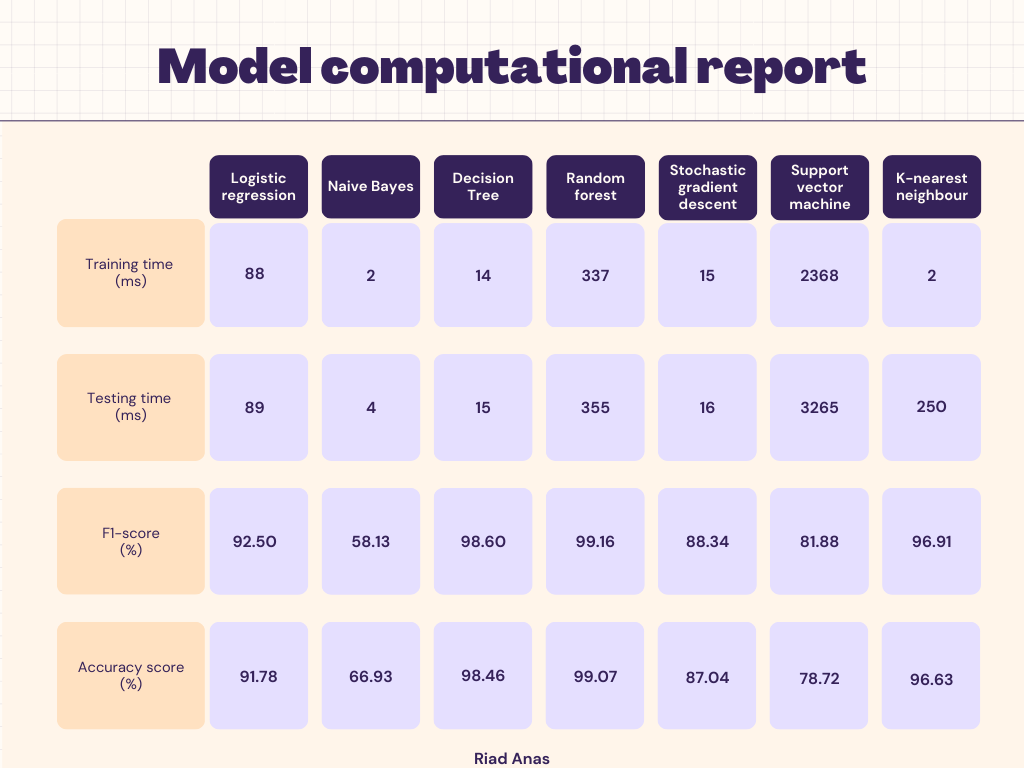

We can clearly see that two models give the highest accuracy:
- Decision Tree: 98.46% accuracy / training time: 14ms
- Random Forest: 99.07% accuracy / training time: 337

The second thing import to consider is the training and testing time. Since, this model is going to be deployed in the cloud it is essential to know how much computing power the model requires. More computing means more resources allocated (bigger computing instances) and higher expenses.

In conclusion, I'm choosing the decision tree model since it gives a very high accuracy output and doesn't require much computing to deploy on AWS Sagemaker which will minimize the cost of the project

### Decision Tree hyperparameters

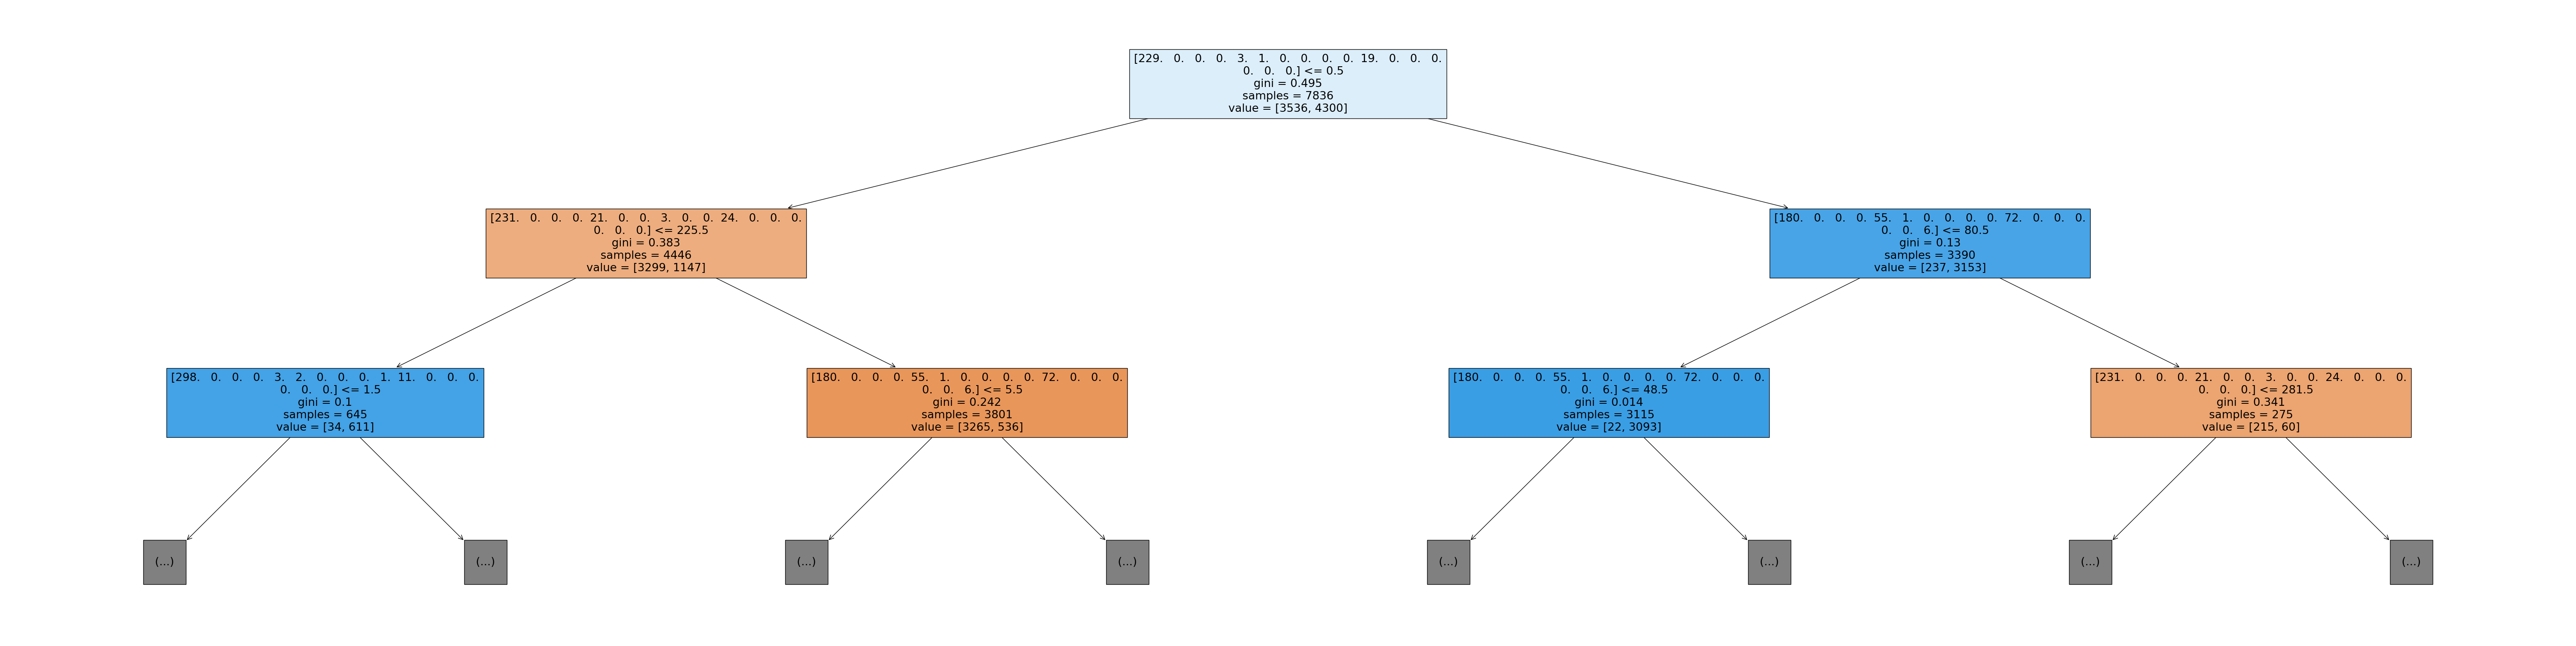

In [114]:
from sklearn.tree import DecisionTreeClassifier

#Call the model
model2 = DecisionTreeClassifier(random_state=112)

#Fit the model
model2.fit(X_train, Y_train)

from sklearn.tree import plot_tree, export_text
plt.figure(figsize =(80,20))

plot_tree(model2, feature_names=X_train, max_depth=2, filled=True);